<a href="https://colab.research.google.com/github/piaosan78/AIFFEL_Quest/blob/master/Main_Quest_01/MQ03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.22.4


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
from PIL import Image
import os, glob

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/scissors"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!


In [13]:
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
import os

def load_data(img_path, number_of_data=3000):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        if idx >= number_of_data:
            break
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        if idx >= number_of_data:
            break
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        if idx >= number_of_data:
            break
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs[:idx], labels[:idx]


학습데이터(x_train)의 이미지 개수는 2000 입니다.
라벨:  1


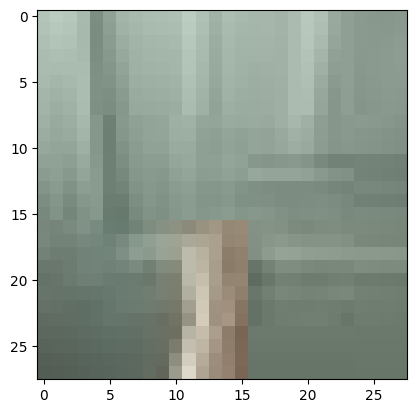

In [14]:
image_dir_path = "/content/drive/MyDrive"  # 이미지 경로를 적절히 수정해야 합니다.
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

In [15]:
print(x_train.shape)
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

(2000, 28, 28, 3)
최소값: 0  최대값: 255


In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [17]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', padding = "valid", input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [19]:
from PIL import Image
import os, glob

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/test/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")


100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [20]:
def load_test_data(img_path, number_of_data=300):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        if idx >= number_of_data:
            break
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        if idx >= number_of_data:
            break
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        if idx >= number_of_data:
            break
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1

    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs[:idx], labels[:idx]

image_dir_path = "/content/drive/MyDrive/test"
(x_test, y_test) = load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

테스트 데이터(x_test)의 이미지 개수는 200 입니다.


In [21]:
print(x_test.shape)

(200, 28, 28, 3)


In [22]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/20
63/63 [==============================] - 3s 29ms/step - loss: 3.0858 - accuracy: 0.6095
Epoch 2/20
63/63 [==============================] - 2s 28ms/step - loss: 0.5814 - accuracy: 0.7095
Epoch 3/20
63/63 [==============================] - 2s 28ms/step - loss: 0.4557 - accuracy: 0.7815
Epoch 4/20
63/63 [==============================] - 2s 27ms/step - loss: 0.3300 - accuracy: 0.8605
Epoch 5/20
63/63 [==============================] - 2s 27ms/step - loss: 0.2751 - accuracy: 0.8950
Epoch 6/20
63/63 [==============================] - 2s 38ms/step - loss: 0.1961 - accuracy: 0.9340
Epoch 7/20
63/63 [==============================] - 3s 48ms/step - loss: 0.1637 - accuracy: 0.9465
Epoch 8/20
63/63 [==============================] - 2s 30ms/step - loss: 0.1201 - accuracy: 0.9625
Epoch 9/20
63/63 [==============================] - 2s 28ms/step - loss: 0.0842 - accuracy: 0.9810
Epoch 10/20
63/63 [==============================] - 2s 28ms/step - loss: 0.0716 - accuracy: 0.9840
Epoch 11/